<h1><center><b> Home Credit Default Risk - EDA </b></center></h1>

### Author: Sai Eshwar Tadepalli

<h1><center><b>Table of Contents</b></center></h1>

1. <a href="#1">Introduction: Business Problem Statement</a>
2. <a href="#2">Description of the data</a><br>
3. <a href="#3">Discussion of missing data</a><br>
4. <a href="#4">Visualizations and summary tables</a><br>
5. <a href="#5">Summary and findings</a><br>

# **1. Introduction: Business Problem Statement** <a name='1'></a>

Home Credit Group, established in 1997, has a mission to provide financial solutions to individuals who have limited or no credit history. A key business challenge they face is accurately evaluating credit risk. They must prevent loan defaults while ensuring that deserving clients can access loans. Home Credit uses various data sources, including telecom and historical transactional data, to enhance the overall borrowing experience. The project's focus is on identifying creditworthy individuals without a credit history, reduce the number of loan rejections for eligible applicants and ensuring loans are not extended to those unable to meet their payment commitments. This enhancement is achieved by evaluating whether a client is likely to meet their loan obligations, effectively utilizing the target variable. In this notebook, I am going to do exploratory data analysis of vast dataset provided by Home Credit. With the help of EDA, I can extract only important information and use it for modeling in the next step.

# **2. Description of the data** <a name='2'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
import seaborn as sns

import os

In [2]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/home-credit-default-risk/
# reading the application_train files and displaying the shape

application_train = pd.read_csv("application_train.csv")
application_train.head()

Mounted at /content/drive/
/content/drive/MyDrive/home-credit-default-risk


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
application_train.shape

(307511, 122)

In the application train dataset, there are a total of 122 unique variables and 307511 rows.

In [4]:
application_test = pd.read_csv("application_test.csv")
application_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
application_test.shape

(48744, 121)

In the application test dataset, there are a total of 121 unique variables without target variable and 48744 rows.

In [6]:
bureau = pd.read_csv("bureau.csv")
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [7]:
bureau.shape

(1716428, 17)

In the bureau dataset, there are a total of 17 variables with 1716428 rows.

In [8]:
bureau_balance = pd.read_csv("bureau_balance.csv")
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [9]:
bureau_balance.shape

(27299925, 3)

In the bureau balance dataset, there are a total of 3 variables with 27299925 rows.

In [10]:
credit_card_balance = pd.read_csv("credit_card_balance.csv")
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [11]:
credit_card_balance.shape

(3840312, 23)

In the credit card balance dataset, there are a total of 23 variables with 3840312 rows.

In [12]:
installments_payments = pd.read_csv("installments_payments.csv")
installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [13]:
installments_payments.shape

(13605401, 8)

In the installments_payments dataset, there are total of 8 variable columns with 13605401 rows.

In [14]:
previous_application = pd.read_csv("previous_application.csv")
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
previous_application.shape

(1670214, 37)

In the previoud application dataset, there are total of 37 variable columns with 1670214 rows.

In [16]:
POS_CASH_balance = pd.read_csv("POS_CASH_balance.csv")
POS_CASH_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [17]:
POS_CASH_balance.shape

(10001358, 8)

In POS_CASH_balance dataset, there are a total of 8 variable columns with 10001358 rows.

# **3. Discussion of missing data** <a name='3'></a>

In [18]:
total_missing=application_train.isnull().sum().sort_values(ascending=False)
percentage_missing=(application_train.isnull().sum()/application_train.isnull().count()*100).sort_values(ascending = False)

pd.concat([total_missing,percentage_missing],axis=1,keys=['Total missing values','Percentage of missing values'])

,Total missing values,Percentage of missing values
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
...,...,...
NAME_HOUSING_TYPE,0,0.000000
NAME_FAMILY_STATUS,0,0.000000
NAME_EDUCATION_TYPE,0,0.000000
NAME_INCOME_TYPE,0,0.000000


The missing values in application train dataset, the total missing values in 'Common area medi' are 214865 composing 68.87 percentage of the total dataset. Similarly, the total missing values in 'Common area avg' are 214865 composing 69.87 percentage of the entire dataset.

In [19]:
application_train['COMMONAREA_MEDI'].value_counts().to_frame().sort_values("COMMONAREA_MEDI",ascending= False)

,COMMONAREA_MEDI
0.0000,8691
0.0079,581
0.0080,486
0.0078,481
0.0014,377
...,...
0.4922,1
0.2957,1
0.6378,1
0.7669,1


In [20]:
if application_train['COMMONAREA_MEDI'].isnull().sum() > 0:
    column_dtype = application_train['COMMONAREA_MEDI'].dtype
    if column_dtype == 'object':
        print("The missing values in 'COMMONAREA_MEDI' column are categorical.")
    else:
        print("The missing values in 'COMMONAREA_MEDI' column are numerical.")
else:
    print("There are no missing values in 'COMMONAREA_MEDI' column.")

The missing values in 'COMMONAREA_MEDI' column are numerical.


In [21]:
application_train['COMMONAREA_MEDI'].fillna(0)

0         0.0144
1         0.0608
2         0.0000
3         0.0000
4         0.0000
           ...  
307506    0.0203
307507    0.0022
307508    0.0124
307509    0.0000
307510    0.0177
Name: COMMONAREA_MEDI, Length: 307511, dtype: float64

In [22]:
application_train['OCCUPATION_TYPE'].value_counts().to_frame().sort_values("OCCUPATION_TYPE",ascending= False)

,OCCUPATION_TYPE
Laborers,55186
Sales staff,32102
Core staff,27570
Managers,21371
Drivers,18603
High skill tech staff,11380
Accountants,9813
Medicine staff,8537
Security staff,6721
Cooking staff,5946


In [23]:
if application_train['OCCUPATION_TYPE'].isnull().sum() > 0:
    column_dtype = application_train['OCCUPATION_TYPE'].dtype
    if column_dtype == 'object':
        print("The missing values in 'OCCUPATION_TYPE' column are categorical.")
    else:
        print("The missing values in 'OCCUPATION_TYPE' column are numerical.")
else:
    print("There are no missing values in 'OCCUPATION_TYPE' column.")

The missing values in 'OCCUPATION_TYPE' column are categorical.


In [24]:
categorical_columns = ['OCCUPATION_TYPE']
for column in categorical_columns:
    if application_train[column].isnull().sum() > 0:
        application_train[column].fillna('Unknown', inplace=True)
application_train['OCCUPATION_TYPE'].value_counts()

Unknown                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [25]:
application_train['NONLIVINGAPARTMENTS_MODE'].value_counts().to_frame().sort_values("NONLIVINGAPARTMENTS_MODE",ascending= False)

,NONLIVINGAPARTMENTS_MODE
0.0000,59255
0.0039,14105
0.0078,6413
0.0117,3675
0.0156,2492
...,...
0.5837,1
0.3463,1
0.8872,1
0.8327,1


In [26]:
if application_train['NONLIVINGAPARTMENTS_MODE'].isnull().sum() > 0:
    column_dtype = application_train['NONLIVINGAPARTMENTS_MODE'].dtype
    if column_dtype == 'object':
        print("The missing values in 'NONLIVINGAPARTMENTS_MODE' column are categorical.")
    else:
        print("The missing values in 'NONLIVINGAPARTMENTS_MODE' column are numerical.")
else:
    print("There are no missing values in 'NONLIVINGAPARTMENTS_MODE' column.")

The missing values in 'NONLIVINGAPARTMENTS_MODE' column are numerical.


In [27]:
application_train['NONLIVINGAPARTMENTS_MODE'].fillna(0)

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
307506    0.0
307507    0.0
307508    0.0
307509    0.0
307510    0.0
Name: NONLIVINGAPARTMENTS_MODE, Length: 307511, dtype: float64

In [28]:
application_train['DAYS_EMPLOYED'].value_counts().to_frame().sort_values("DAYS_EMPLOYED",ascending= False)

,DAYS_EMPLOYED
365243,55374
-200,156
-224,152
-230,151
-199,151
...,...
-9281,1
-9556,1
-14743,1
-16266,1


Imputing missing values in the dataset, such as 'DAYS_EMPLOYED,' 'NONLIVINGAPARTMENTS_MODE,' 'OCCUPATION_TYPE,' and 'OCCUPATION_TYPE,' involves filling these gaps with either 0 (for numerical attributes) or 'Unknown' (for categorical attributes), depending on their data type. This practice of handling missing data is a prudent approach, especially when working with extensive datasets. Given the numerous columns within the application train dataset, the overarching plan is to systematically impute missing values for all relevant attributes. This proactive strategy not only ensures the completeness of the dataset but also contributes to more robust and comprehensive analyses in the future.

In [29]:
total_missing=application_test.isnull().sum().sort_values(ascending=False)
percentage_missing=(application_test.isnull().sum()/application_test.isnull().count()*100).sort_values(ascending = False)

pd.concat([total_missing,percentage_missing],axis=1,keys=['Total missing values','Percentage of missing values'])

,Total missing values,Percentage of missing values
COMMONAREA_AVG,33495,68.716150
COMMONAREA_MODE,33495,68.716150
COMMONAREA_MEDI,33495,68.716150
NONLIVINGAPARTMENTS_AVG,33347,68.412523
NONLIVINGAPARTMENTS_MODE,33347,68.412523
...,...,...
NAME_HOUSING_TYPE,0,0.000000
NAME_FAMILY_STATUS,0,0.000000
NAME_EDUCATION_TYPE,0,0.000000
NAME_INCOME_TYPE,0,0.000000


In [30]:
total_missing=bureau.isnull().sum().sort_values(ascending=False)
percentage_missing=(bureau.isnull().sum()/bureau.isnull().count()*100).sort_values(ascending = False)

pd.concat([total_missing,percentage_missing],axis=1,keys=['Total missing values','Percentage of missing values'])

,Total missing values,Percentage of missing values
AMT_ANNUITY,1226791,71.473490
AMT_CREDIT_MAX_OVERDUE,1124488,65.513264
DAYS_ENDDATE_FACT,633653,36.916958
AMT_CREDIT_SUM_LIMIT,591780,34.477415
AMT_CREDIT_SUM_DEBT,257669,15.011932
DAYS_CREDIT_ENDDATE,105553,6.149573
AMT_CREDIT_SUM,13,0.000757
CREDIT_ACTIVE,0,0.000000
CREDIT_CURRENCY,0,0.000000
DAYS_CREDIT,0,0.000000


In [31]:
total_missing=bureau_balance.isnull().sum().sort_values(ascending=False)
percentage_missing=(bureau_balance.isnull().sum()/bureau_balance.isnull().count()*100).sort_values(ascending = False)

pd.concat([total_missing,percentage_missing],axis=1,keys=['Total missing values','Percentage of missing values'])

,Total missing values,Percentage of missing values
SK_ID_BUREAU,0,0.0
MONTHS_BALANCE,0,0.0
STATUS,0,0.0


In [32]:
total_missing=credit_card_balance.isnull().sum().sort_values(ascending=False)
percentage_missing=(credit_card_balance.isnull().sum()/credit_card_balance.isnull().count()*100).sort_values(ascending = False)

pd.concat([total_missing,percentage_missing],axis=1,keys=['Total missing values','Percentage of missing values'])

,Total missing values,Percentage of missing values
AMT_PAYMENT_CURRENT,767988,19.998063
AMT_DRAWINGS_ATM_CURRENT,749816,19.524872
CNT_DRAWINGS_POS_CURRENT,749816,19.524872
AMT_DRAWINGS_OTHER_CURRENT,749816,19.524872
AMT_DRAWINGS_POS_CURRENT,749816,19.524872
CNT_DRAWINGS_OTHER_CURRENT,749816,19.524872
CNT_DRAWINGS_ATM_CURRENT,749816,19.524872
CNT_INSTALMENT_MATURE_CUM,305236,7.948208
AMT_INST_MIN_REGULARITY,305236,7.948208
SK_ID_PREV,0,0.000000


In [33]:
total_missing=installments_payments.isnull().sum().sort_values(ascending=False)
percentage_missing=(installments_payments.isnull().sum()/installments_payments.isnull().count()*100).sort_values(ascending = False)

pd.concat([total_missing,percentage_missing],axis=1,keys=['Total missing values','Percentage of missing values'])

,Total missing values,Percentage of missing values
DAYS_ENTRY_PAYMENT,2905,0.021352
AMT_PAYMENT,2905,0.021352
SK_ID_PREV,0,0.000000
SK_ID_CURR,0,0.000000
NUM_INSTALMENT_VERSION,0,0.000000
NUM_INSTALMENT_NUMBER,0,0.000000
DAYS_INSTALMENT,0,0.000000
AMT_INSTALMENT,0,0.000000


In [34]:
total_missing=previous_application.isnull().sum().sort_values(ascending=False)
percentage_missing=(previous_application.isnull().sum()/previous_application.isnull().count()*100).sort_values(ascending = False)

pd.concat([total_missing,percentage_missing],axis=1,keys=['Total missing values','Percentage of missing values'])

,Total missing values,Percentage of missing values
RATE_INTEREST_PRIVILEGED,1664263,99.643698
RATE_INTEREST_PRIMARY,1664263,99.643698
AMT_DOWN_PAYMENT,895844,53.636480
RATE_DOWN_PAYMENT,895844,53.636480
NAME_TYPE_SUITE,820405,49.119754
NFLAG_INSURED_ON_APPROVAL,673065,40.298129
DAYS_TERMINATION,673065,40.298129
DAYS_LAST_DUE,673065,40.298129
DAYS_LAST_DUE_1ST_VERSION,673065,40.298129
DAYS_FIRST_DUE,673065,40.298129


In [35]:
total_missing=POS_CASH_balance.isnull().sum().sort_values(ascending=False)
percentage_missing=(POS_CASH_balance.isnull().sum()/POS_CASH_balance.isnull().count()*100).sort_values(ascending = False)

pd.concat([total_missing,percentage_missing],axis=1,keys=['Total missing values','Percentage of missing values'])

,Total missing values,Percentage of missing values
CNT_INSTALMENT_FUTURE,26087,0.260835
CNT_INSTALMENT,26071,0.260675
SK_ID_PREV,0,0.000000
SK_ID_CURR,0,0.000000
MONTHS_BALANCE,0,0.000000
NAME_CONTRACT_STATUS,0,0.000000
SK_DPD,0,0.000000
SK_DPD_DEF,0,0.000000


**Scope:** The dataset contains NA values in several columns, which need to be handled carefully during data preprocessing. However, NA represents a missing feature rather than a value when it comes to some of the variables (mentioned in the data dictionary). To overcome the problem of NA we encode these variables using 'fillna' function.

**Proposed Solution:** The missing values can be imputed or removed using a variety of methods, including deletion of the entire column or row, regression imputation, mean or median imputation, and mode imputation. To avoid bias or overfitting in the models, it is essential to handle missing values properly.



In [36]:
target_counts=application_train['TARGET'].value_counts()
target_percent=target_counts/target_counts.sum()*100

pd.concat([target_counts,target_percent],axis=1,keys=['Count of target','Percent of target'])

,Count of target,Percent of target
0,282686,91.927118
1,24825,8.072882


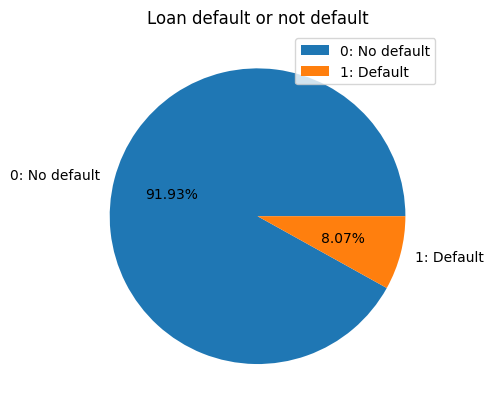

In [37]:
default = ["0: No default", "1: Default"]
plt.pie(target_counts, labels = default, autopct ='%1.2f%%')
plt.title("Loan default or not default")
plt.legend()
plt.show()

In [38]:
categorical_columns = application_train.select_dtypes('object').apply(pd.Series.nunique,axis=0)
categorical_columns

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               19
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [39]:
class_counts = application_train['TARGET'].value_counts()
majority_class = class_counts.idxmax()
majority_proportion = class_counts[majority_class] / len(application_train)

# Calculate the accuracy of the majority class classifier
accuracy = majority_proportion * 100  # Multiply by 100 to get the percentage

print("Accuracy of the majority class classifier is: {:.2f}%".format(accuracy))

Accuracy of the majority class classifier is: 91.93%


In [40]:
# Selecting only numerical columns
numerical_columns = application_train.select_dtypes(include=[np.number])

z_scores = (numerical_columns - numerical_columns.mean()) / numerical_columns.std()

threshold = 3
outliers = (z_scores > threshold) | (z_scores < -threshold)

outlier_percentages = (outliers.sum() / outliers.shape[0]) * 100
print(outlier_percentages.sort_values(ascending=False))

FLAG_DOCUMENT_6                8.805539
FLAG_DOCUMENT_8                8.137595
TARGET                         8.072882
REG_CITY_NOT_LIVE_CITY         7.817281
FLAG_EMAIL                     5.671992
                                 ...   
DAYS_EMPLOYED                  0.000000
REG_CITY_NOT_WORK_CITY         0.000000
EXT_SOURCE_1                   0.000000
REGION_RATING_CLIENT_W_CITY    0.000000
SK_ID_CURR                     0.000000
Length: 106, dtype: float64


In [41]:
# Select only numeric columns for correlation calculation
numeric_columns = application_train.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr()

# Extract the correlation of 'TARGET' with other numeric variables
target_correlation = correlation_matrix['TARGET']

# Sort the correlations in ascending order
target_correlation_sorted = target_correlation.sort_values(ascending=False)

# Display the top correlated variables
target_correlation_sorted.head()

TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
Name: TARGET, dtype: float64

The 'TARGET' variable exhibits a positive correlation of approximately 0.078 with 'DAYS_BIRTH,' suggesting that as a client's age (measured in negative days) increases, there is a slight increase in the likelihood of loan default. Additionally, 'REGION_RATING_CLIENT_W_CITY' and 'REGION_RATING_CLIENT' show positive correlations of about 0.061 and 0.059, respectively, with the 'TARGET' variable. These variables represent regional rating scores, indicating that clients residing in areas with higher ratings may have a somewhat elevated likelihood of repaying their loans. Furthermore, 'DAYS_LAST_PHONE_CHANGE' displays a positive correlation of roughly 0.055 with the 'TARGET' variable. This suggests that more recent changes in a client's registered phone number may be associated with a slightly higher probability of loan default. It's important to note that while these correlations provide valuable insights, they are relatively weak, indicating that other factors beyond these variables likely contribute significantly to the prediction of loan default. Therefore, a comprehensive analysis of the dataset should consider multiple features and their interplay in predicting loan outcomes.

# **4. Visualizations and summary tables** <a name='4'></a>

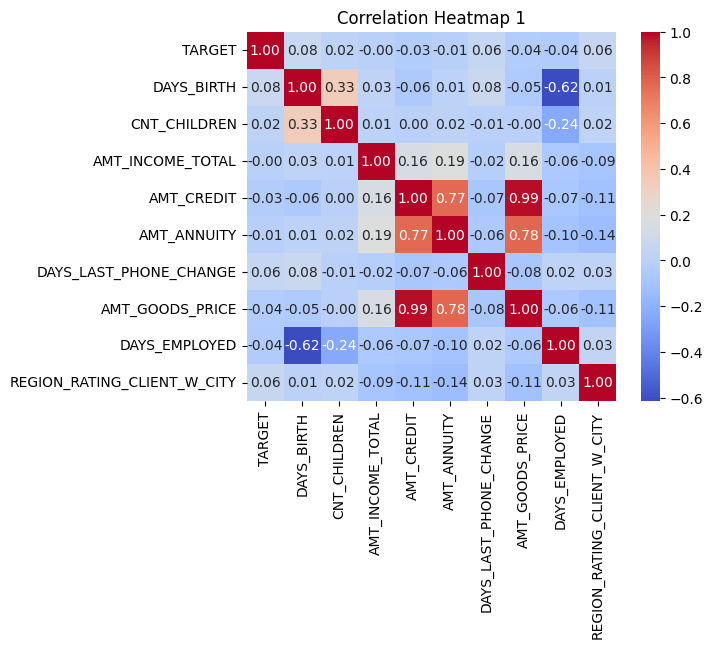

In [42]:
selected_columns = ['TARGET','DAYS_BIRTH','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','DAYS_LAST_PHONE_CHANGE','AMT_GOODS_PRICE','DAYS_EMPLOYED','REGION_RATING_CLIENT_W_CITY']
subset_corr_matrix = correlation_matrix.loc[selected_columns, selected_columns]

# Generate a heatmap using seaborn for the subset correlation matrix
sns.heatmap(subset_corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", square=True)

# Set the plot title
plt.title('Correlation Heatmap 1')

# Display the heatmap
plt.show()

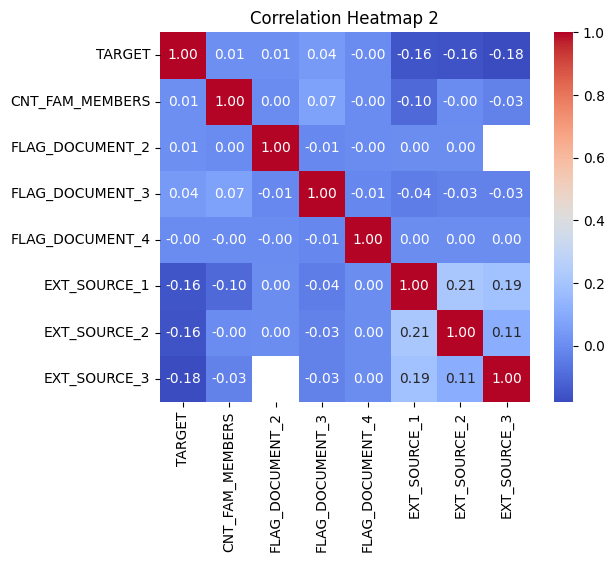

In [43]:
selected_columns = ['TARGET','CNT_FAM_MEMBERS','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']
subset_corr_matrix = correlation_matrix.loc[selected_columns, selected_columns]

# Generate a heatmap using seaborn for the subset correlation matrix
sns.heatmap(subset_corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", square=True)

# Set the plot title
plt.title('Correlation Heatmap 2')

# Display the heatmap
plt.show()

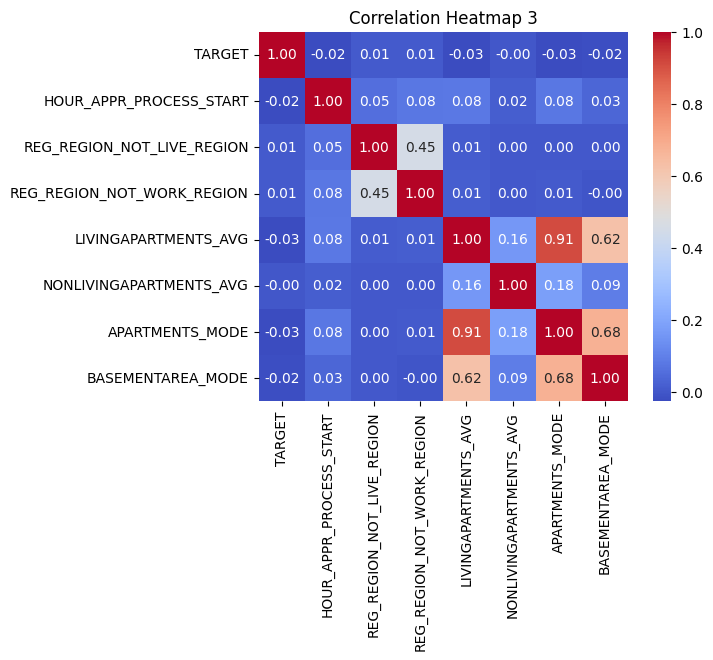

In [44]:
selected_columns = ['TARGET','HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVINGAPARTMENTS_AVG','NONLIVINGAPARTMENTS_AVG','APARTMENTS_MODE','BASEMENTAREA_MODE']
subset_corr_matrix = correlation_matrix.loc[selected_columns, selected_columns]

# Generate a heatmap using seaborn for the subset correlation matrix
sns.heatmap(subset_corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", square=True)

# Set the plot title
plt.title('Correlation Heatmap 3')

# Display the heatmap
plt.show()

**Relationship between target and flag email**

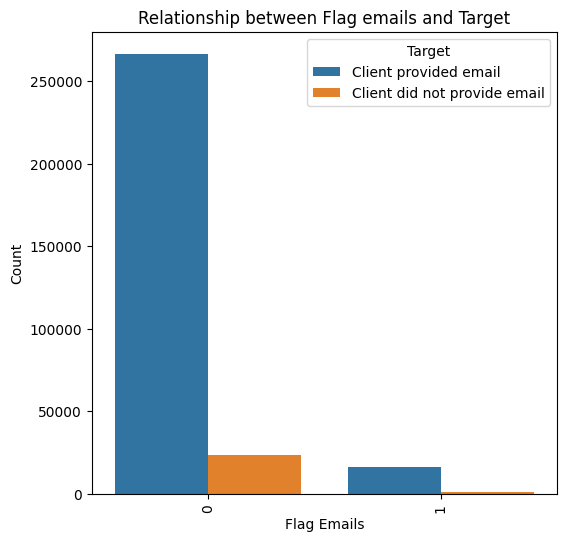

In [45]:
email = application_train['FLAG_EMAIL'].value_counts().sort_values(ascending=False).index
plt.figure(figsize=(6, 6))
sns.countplot(data=application_train, x='FLAG_EMAIL', hue='TARGET',order=email)

plt.xticks(rotation=90)
plt.xlabel('Flag Emails')
plt.ylabel('Count')
plt.title('Relationship between Flag emails and Target')
plt.legend(title='Target', labels=['Client provided email', 'Client did not provide email'])
plt.show()

**Relationship between target and loan default by income type**

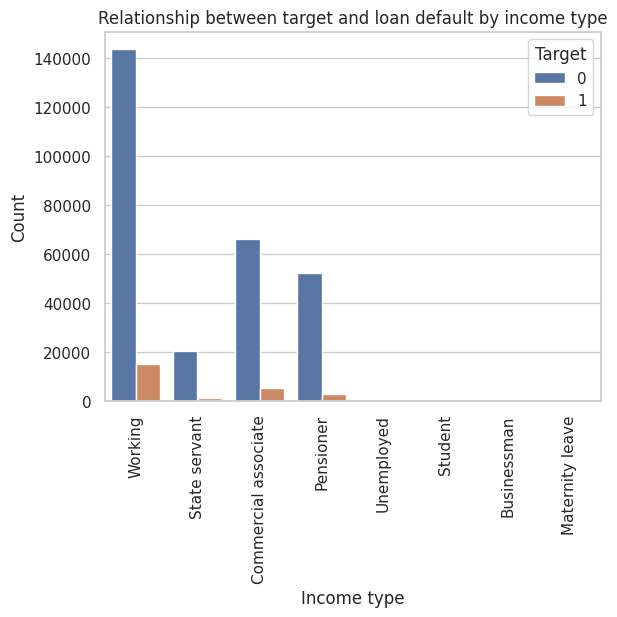

In [46]:
sns.set(style="whitegrid")
income = sns.countplot(x='NAME_INCOME_TYPE', hue = 'TARGET',
                       data = application_train)
plt.xlabel('Income type')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.title('Relationship between target and loan default by income type')
plt.legend(title = 'Target')
plt.show()

In [47]:
income_type = application_train.pivot_table(index = ["NAME_INCOME_TYPE"],
                                      columns= ["TARGET"],
                                      values = 'SK_ID_CURR', aggfunc="count")
income_type

TARGET,0,1
NAME_INCOME_TYPE,,
Businessman,10.0,NaN
Commercial associate,66257.0,5360.0
Maternity leave,3.0,2.0
Pensioner,52380.0,2982.0
State servant,20454.0,1249.0
Student,18.0,NaN
Unemployed,14.0,8.0
Working,143550.0,15224.0


Notable observations include the relatively lower default rates among 'Businessmen' and 'Students,' where instances of default are NaN. Conversely, individuals categorized as 'Working' exhibit a higher default rate compared to 'Commercial associates' and 'State servants' with 143550. 'Pensioners' also display a lower default rate with 2982.

In [48]:
loan_type = application_train.pivot_table(index = ["NAME_CONTRACT_TYPE"],
                                      columns= ["TARGET", ],
                                      values = 'SK_ID_CURR', aggfunc="count")
print(loan_type)

TARGET                   0      1
NAME_CONTRACT_TYPE               
Cash loans          255011  23221
Revolving loans      27675   1604


'Cash loans' account for the majority of loan contracts, with 255,011 instances, while 'Revolving loans' represent a smaller subset, with 27,675 instances. Considering loan repayment behavior, 'Cash loans' show a relatively higher default rate, with 23,221 instances of default (i.e '1'), while 'Revolving loans' exhibit a lower default rate, with 1,604 instances of default (i.e '1'). This suggests that 'Revolving loans' may be associated with a lower default risk compared to 'Cash loans'.

In [49]:
education_type = application_train.pivot_table(index = ["NAME_EDUCATION_TYPE"],
                                      columns= ["TARGET", ],
                                      values = 'SK_ID_CURR', aggfunc="count")
print(education_type)

TARGET                              0      1
NAME_EDUCATION_TYPE                         
Academic degree                   161      3
Higher education                70854   4009
Incomplete higher                9405    872
Lower secondary                  3399    417
Secondary / secondary special  198867  19524


Individuals with 'academic degree' education represent with 161 instances, and they have a minimal default rate of only 3 instances. In contrast, those with 'higher education' constitute a substantial portion of applicants, with 70,854 instances, but they also have a relatively higher default rate of 4,009 instances. 'incomplete higher' and 'lower secondary' education categories have lower instances but exhibit moderate default rates, while the 'secondary / secondary special' category, being the most prevalent, demonstrates both a higher number of applicants (198,867) and a higher default rate (19,524). These findings suggest a potential correlation between education level and loan repayment behavior.

In [50]:
status_type = application_train.pivot_table(index = ["NAME_FAMILY_STATUS"],
                                      columns= ["TARGET", ],
                                      values = 'SK_ID_CURR', aggfunc="count")
print(status_type)

TARGET                       0        1
NAME_FAMILY_STATUS                     
Civil marriage         26814.0   2961.0
Married               181582.0  14850.0
Separated              18150.0   1620.0
Single / not married   40987.0   4457.0
Unknown                    2.0      NaN
Widow                  15151.0    937.0


The 'Married' category constitutes the largest group of applicants, with 181,582 instances, accompanied by a default rate of 14,850 instances. 'Single / not married' applicants follow with 40,987 instances, and a default rate of 4,457. Interestingly, 'Civil marriage' and 'Separated' categories show moderately lower instances but also moderate default rates. 'Widows' and 'Unknown' marital statuses have notably fewer instances, with 'Widows' experiencing a relatively low default rate, while 'Unknown' has no recorded defaults. These observations suggest a connection between marital status and loan repayment behavior, with 'Married' and 'Single / not married'.

In [51]:
house_type = application_train.pivot_table(index = ["NAME_HOUSING_TYPE"],
                                      columns= ["TARGET", ],
                                      values = 'SK_ID_CURR', aggfunc="count")
print(house_type)

TARGET                    0      1
NAME_HOUSING_TYPE                 
Co-op apartment        1033     89
House / apartment    251596  21272
Municipal apartment   10228    955
Office apartment       2445    172
Rented apartment       4280    601
With parents          13104   1736


'House / apartment' is the most common housing type, with 251,596 instances, and a default rate of 21,272 instances. 'With parents' and 'Municipal apartment' follow as the next prevalent categories, with 13,104 and 10,228 instances, respectively. These categories also exhibit relatively higher default rates, with 1,736 and 955 instances of default, respectively. In contrast, 'Co-op apartment' and 'Office apartment' have fewer instances and lower default rates.

**Relationship between Occupation Type and Target**

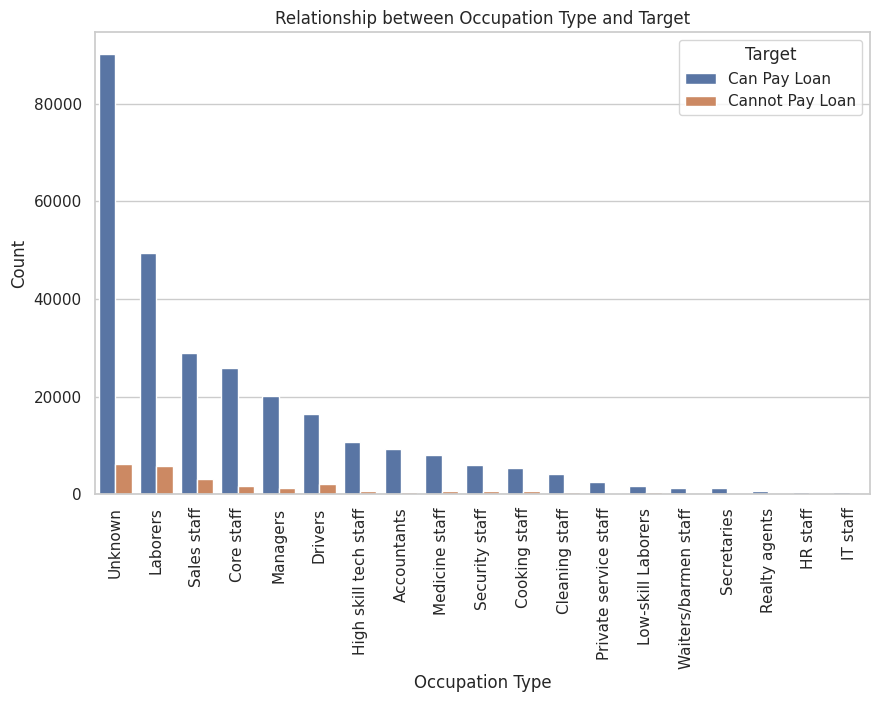

In [52]:
sorted_occupations = application_train['OCCUPATION_TYPE'].value_counts().sort_values(ascending=False).index
plt.figure(figsize=(10, 6))
sns.countplot(data=application_train, x='OCCUPATION_TYPE', hue='TARGET',order=sorted_occupations)
plt.xticks(rotation=90)
plt.xlabel('Occupation Type')
plt.ylabel('Count')
plt.title('Relationship between Occupation Type and Target')
plt.legend(title='Target', labels=['Can Pay Loan', 'Cannot Pay Loan'])
plt.show()

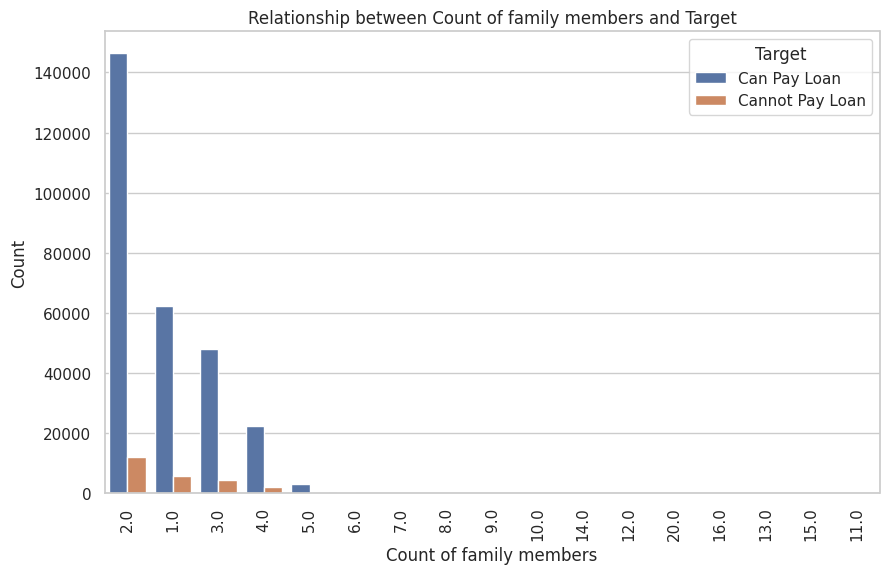

In [53]:
sorted_occupations = application_train['CNT_FAM_MEMBERS'].value_counts().sort_values(ascending=False).index
plt.figure(figsize=(10, 6))
sns.countplot(data=application_train, x='CNT_FAM_MEMBERS', hue='TARGET',order=sorted_occupations)
plt.xticks(rotation=90)
plt.xlabel('Count of family members')
plt.ylabel('Count')
plt.title('Relationship between Count of family members and Target')
plt.legend(title='Target', labels=['Can Pay Loan', 'Cannot Pay Loan'])
plt.show()

**Relationship between Target and Gender**

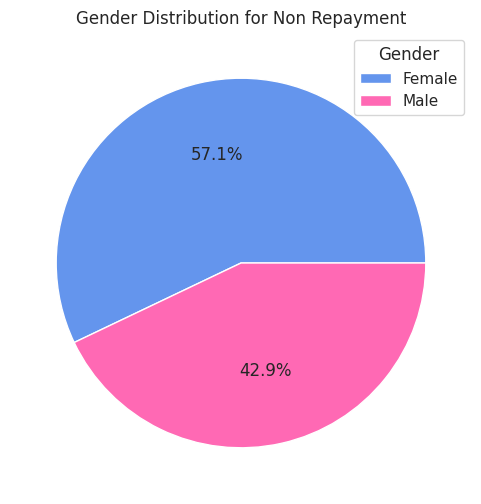

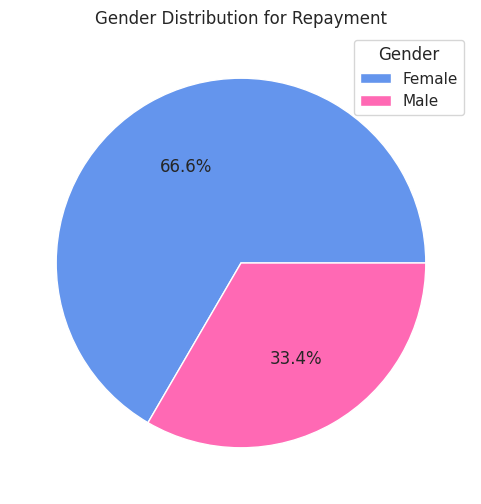

In [54]:
#Dropping XNA values in Gender Column
application_train["CODE_GENDER"].value_counts()
application_train.drop(application_train[application_train['CODE_GENDER'] == 'XNA'].index, inplace=True)
target_1_df = application_train[application_train['TARGET'] == 1]
target_0_df = application_train[application_train['TARGET'] == 0]

colors = ['#6495ED', '#FF69B4']
gender_counts_target_1 = target_1_df['CODE_GENDER'].value_counts()
gender_counts_target_0 = target_0_df['CODE_GENDER'].value_counts()

# Plotting the pie chart for Target=1
plt.figure(figsize=(6, 6))
plt.pie(gender_counts_target_1, autopct='%1.1f%%', colors=colors)
plt.title('Gender Distribution for Non Repayment')
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.show()

# Plotting the pie chart for Target=0
plt.figure(figsize=(6, 6))
plt.pie(gender_counts_target_0, autopct='%1.1f%%', colors=colors)
plt.title('Gender Distribution for Repayment')
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.show()

**Distribution of Income Amount of Client**

Text(0.5, 1.0, "Distribution of age of client's car")

<Figure size 1000x500 with 0 Axes>

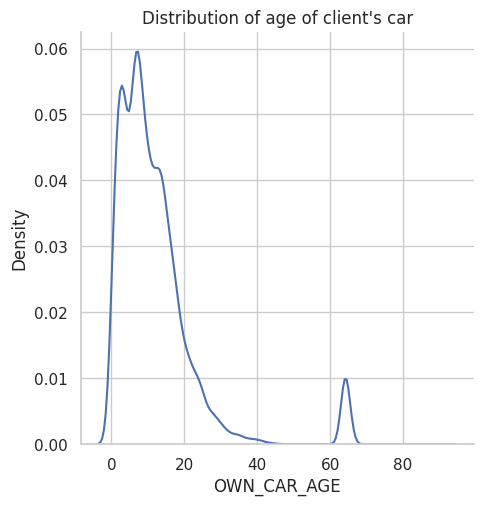

In [55]:
plt.figure(figsize=(10,5))
sns.displot(data=application_train, x = "OWN_CAR_AGE", kind = 'kde')
plt.title("Distribution of age of client's car")

**Distribution of children count of client**

Text(0.5, 1.0, 'Distribution of Children count client has')

<Figure size 1000x500 with 0 Axes>

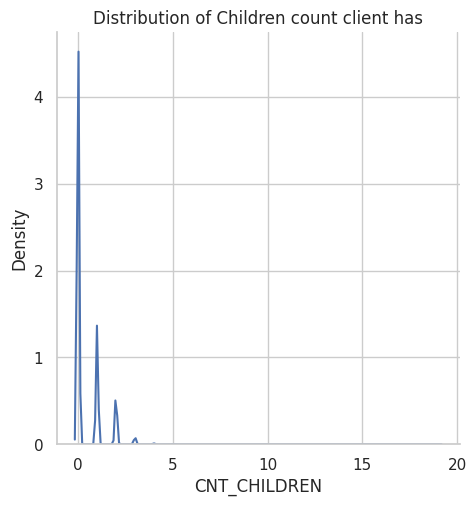

In [56]:
plt.figure(figsize=(10,5))
sns.displot(data=application_train, x = "CNT_CHILDREN", kind = 'kde')
plt.title("Distribution of Children count client has")

**Distribution of loan annuity**

Text(0.5, 1.0, 'Distribution of loan annuity')

<Figure size 1000x500 with 0 Axes>

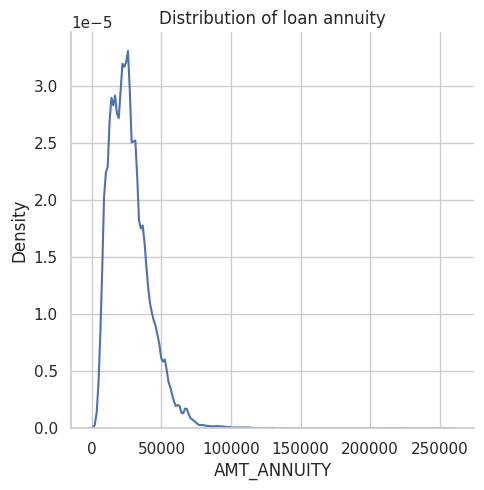

In [57]:
plt.figure(figsize=(10,5))
sns.displot(data=application_train, x = "AMT_ANNUITY", kind = 'kde')
plt.title("Distribution of loan annuity")

**Distribution of credit amount**

Text(0.5, 1.0, 'Distribution of credit amount')

<Figure size 1000x500 with 0 Axes>

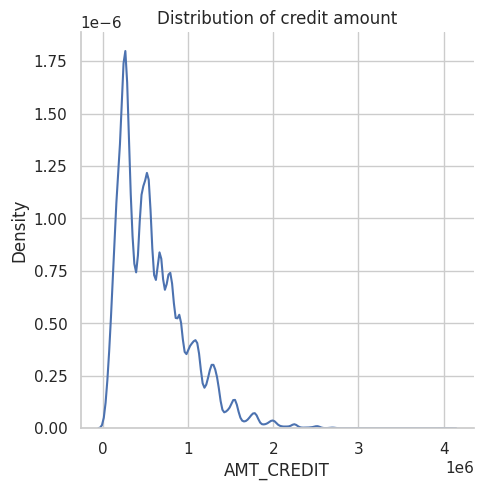

In [58]:
plt.figure(figsize=(10,5))
sns.displot(data=application_train, x = "AMT_CREDIT", kind = 'kde')
plt.title("Distribution of credit amount")

**Distribution of amount of goods price**

Text(0.5, 1.0, 'Distribution of amount of goods price')

<Figure size 1000x500 with 0 Axes>

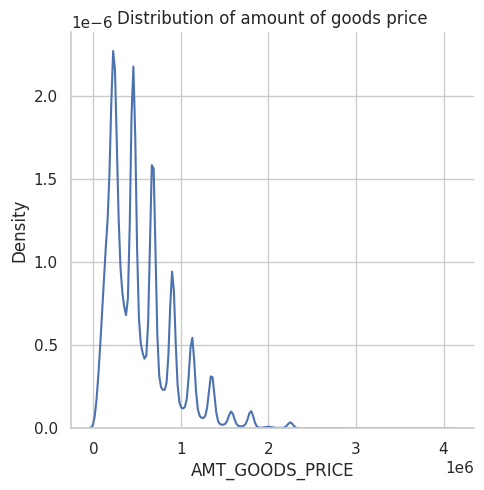

In [59]:
plt.figure(figsize=(10,5))
sns.displot(data=application_train, x = "AMT_GOODS_PRICE", kind = 'kde')
plt.title("Distribution of amount of goods price")

# **5. Summary and findings** <a name='5'></a>

In the extensive realm of data encompassing our training and testing datasets, we encounter the task of effectively choosing the columns that are genuinely relevant for our model. The 'Target' variable displays an uneven distribution, where the majority class classifier represents 8.07% of the dataset, equivalent to 24,825 instances. In contrast, the non-majority class classifier '0' makes up the larger share, comprising 91.92% of the dataset, encompassing 282,686 instances. The accuracy achieved by the majority class classifier, indicating that when predicting the majority class (likely the non-default category), the classifier is accurate approximately 91.93% of the time.

Firstly, among different income source categories, 'Businessmen' and 'Students' exhibit exceptionally low default rates, with no instances of default recorded (NaN). Conversely, 'Working' individuals demonstrate a comparatively higher default rate, comprising 143,550 instances. 'Commercial associates' and 'State servants' also show relatively lower default rates, with 5,360 and 1,249 instances, respectively. 'Pensioners' present the lowest default rate at 2,982 instances.

Secondly, concerning the type of loan contracts, 'Cash loans' dominate the dataset, accounting for 255,011 instances, but they have a higher default rate with 23,221 instances of default (i.e '1'). In contrast, 'Revolving loans' represent a smaller portion, with 27,675 instances, but exhibit a lower default rate of 1,604 instances (i.e '1'). This indicates that 'Revolving loans' tend to carry a lower risk of default compared to 'Cash loans.'

Lastly, education level appears to influence loan repayment behavior. Applicants with 'academic degree' education, although relatively few with 161 instances, display an impressively low default rate of only 3 instances. Conversely, 'higher education' applicants, being more prevalent with 70,854 instances, exhibit a relatively higher default rate of 4,009 instances. 'Incomplete higher' and 'lower secondary' education categories have lower instances but show moderate default rates, while the 'secondary/secondary special' category, the most common, features both a higher number of applicants (198,867) and a higher default rate of 19,524 instances. These observations suggest a potential correlation between education level and loan repayment behavior, highlighting the significance of education in assessing loan risk.

The 'TARGET' variable is modestly positively correlated (around 0.078) with 'DAYS_BIRTH,' implying that as a client's age (measured in negative days) increases, there is a slight uptick in the likelihood of loan default. Additionally, 'REGION_RATING_CLIENT_W_CITY' and 'REGION_RATING_CLIENT' have slightly positive correlations of about 0.061 and 0.059, respectively, with the 'TARGET' variable. Conducting a thorough model analysis necessitates the comprehensive cleaning of the entire dataset, which is a meticulous process requiring a bit more time and attention to detail.